In [ ]:
'''задача регресии - предсказание цены на автомобиль на вторичном рынке
данные по автомобилям взяты с сайта auto.ru
марка toyota, регион вся Россия, т.к. много автомобилей в продаже и иномарка с большим
количеством опций = много параметров
'''

In [1]:
import requests, json
import pandas as pd
import numpy as np

In [4]:
url = 'https://auto.ru/-/ajax/desktop/listing/'

headers = '''
Host: auto.ru
Connection: keep-alive
Content-Length: 90
x-requested-with: fetch
x-client-date: 1621148259922
x-csrf-token: 53b11b57e14caad9a0f6545e1ef9c004344176527b8351c8
x-page-request-id: 5583f4a5f07cc65d83663e74ff1b70c0
content-type: application/json
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.105 YaBrowser/21.3.3.230 Yowser/2.5 Safari/537.36
x-client-app-version: bce8a8244b5
Accept: */*
Origin: https://auto.ru
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: same-origin
Sec-Fetch-Dest: empty
Referer: https://auto.ru/cars/toyota/all/?has_image=false
Accept-Encoding: gzip, deflate, br
Accept-Language: ru,en;q=0.9
Cookie: _csrf_token=53b11b57e14caad9a0f6545e1ef9c004344176527b8351c8; autoru_sid=a%3Ag60a0bd3b2kqo25taqtiurr1a4b4d51m.80f887a40a36dfb853a77cf7b336d6db%7C1621146939864.604800.JAeqRS8yheUp5PIRxIh1OQ.DUlv-c7QyZSrcTyrXHBBNbK770wzMNBCaY3D8qnxgSc; autoruuid=g60a0bd3b2kqo25taqtiurr1a4b4d51m.80f887a40a36dfb853a77cf7b336d6db; suid=194dd15489105d4ab112cc1abd10309b.ae2f3c36bea592b199755baa130632f9; from=yandex; X-Vertis-DC=vla; yuidlt=1; yandexuid=332162211609488292; my=YwA%3D; gdpr=0; _ym_uid=1621146945736424170; SLG_GWPT_Show_Hide_tmp=1; SLG_wptGlobTipTmp=1; _ym_isad=2; gids=; autoru-visits-count=1; autoru-visits-session-unexpired=1; cycada=A3OZrDhunGBqglrPWUvvLndT3sQMgvERWs6+hb0petI=; from_lifetime=1621148256797; _ym_d=1621148256'''

headers = headers.strip().split('\n')
headers_dict = {}
for header in headers:
    key, value = header.split(': ')
    headers_dict[key] = value
headers_dict

{'Host': 'auto.ru',
 'Connection': 'keep-alive',
 'Content-Length': '90',
 'x-requested-with': 'fetch',
 'x-client-date': '1621148259922',
 'x-csrf-token': '53b11b57e14caad9a0f6545e1ef9c004344176527b8351c8',
 'x-page-request-id': '5583f4a5f07cc65d83663e74ff1b70c0',
 'content-type': 'application/json',
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.105 YaBrowser/21.3.3.230 Yowser/2.5 Safari/537.36',
 'x-client-app-version': 'bce8a8244b5',
 'Accept': '*/*',
 'Origin': 'https://auto.ru',
 'Sec-Fetch-Site': 'same-origin',
 'Sec-Fetch-Mode': 'same-origin',
 'Sec-Fetch-Dest': 'empty',
 'Referer': 'https://auto.ru/cars/toyota/all/?has_image=false',
 'Accept-Encoding': 'gzip, deflate, br',
 'Accept-Language': 'ru,en;q=0.9',
 'Cookie': '_csrf_token=53b11b57e14caad9a0f6545e1ef9c004344176527b8351c8; autoru_sid=a%3Ag60a0bd3b2kqo25taqtiurr1a4b4d51m.80f887a40a36dfb853a77cf7b336d6db%7C1621146939864.604800.JAeqRS8yheUp5PIRxIh1OQ.DUlv-c

In [6]:
toyota_offers = []
for _ in range(1, 100):
    params = {"catalog_filter": [{"mark": "TOYOTA"}],
          "section": "all",
         "page":_}
    response = requests.post(url, 
                             json=params, 
                             headers = headers_dict)
    data = response.json()
    toyota_offers.extend(data['offers'])
    print('page:', _, 'lenght:', len(data['offers']), 'total lenght: ', len(toyota_offers))

page: 1 lenght: 37 total lenght:  37
page: 2 lenght: 37 total lenght:  74
page: 3 lenght: 37 total lenght:  111
page: 4 lenght: 37 total lenght:  148
page: 5 lenght: 37 total lenght:  185
page: 6 lenght: 37 total lenght:  222
page: 7 lenght: 37 total lenght:  259
page: 8 lenght: 37 total lenght:  296
page: 9 lenght: 37 total lenght:  333
page: 10 lenght: 37 total lenght:  370
page: 11 lenght: 37 total lenght:  407
page: 12 lenght: 37 total lenght:  444
page: 13 lenght: 37 total lenght:  481
page: 14 lenght: 37 total lenght:  518
page: 15 lenght: 37 total lenght:  555
page: 16 lenght: 37 total lenght:  592
page: 17 lenght: 37 total lenght:  629
page: 18 lenght: 37 total lenght:  666
page: 19 lenght: 37 total lenght:  703
page: 20 lenght: 37 total lenght:  740
page: 21 lenght: 37 total lenght:  777
page: 22 lenght: 37 total lenght:  814
page: 23 lenght: 37 total lenght:  851
page: 24 lenght: 37 total lenght:  888
page: 25 lenght: 37 total lenght:  925
page: 26 lenght: 37 total lenght:  9

In [8]:
offers = toyota_offers.copy()

In [9]:
offers[0]

{'availability': 'ON_ORDER',
 'category': 'cars',
 'color_hex': 'FAFBFB',
 'delivery_info': {},
 'description': '[hioocoa:56078]',
 'discount_options': {},
 'documents': {'pts_original': True,
  'custom_cleared': True,
  'year': 2021,
  'vin': 'XW7**************',
  'pts': 'ORIGINAL'},
 'is_favorite': False,
 'old_category_id': 15,
 'owner_expenses': {'transport_tax': {'tax_by_year': 9000,
   'year': 2021,
   'rid': 11282,
   'rate': 45,
   'horse_power': 200,
   'holding_period_month': 12,
   'boost': 1},
  'osago_insurance': [{'insurance_company': 'TINKOFF', 'price': 5994}]},
 'score': {},
 'section': 'new',
 'seller_type': 'COMMERCIAL',
 'services': [{'service': 'all_sale_special',
   'is_active': True,
   'prolongable': False},
  {'service': 'all_sale_premium', 'is_active': True, 'prolongable': False},
  {'service': 'all_sale_toplist', 'is_active': True, 'prolongable': False},
  {'service': 'all_sale_premium', 'is_active': True, 'prolongable': False}],
 'status': 'ACTIVE',
 'tags':

In [11]:
print(offers[10]['price_info']['price'], data['offers'][3]['price_info']['currency'])
print(offers[10]['documents']['year'])
print(offers[10]['documents']['owners_number'])
print(offers[10]['seller_type'])
print(offers[10]['section'])
print(offers[10]['state']['images_count'])

929000 RUR
2008
2
COMMERCIAL
used
18


In [12]:
print(offers[10]['seller']['location']['coord']['latitude'])
print(offers[10]['seller']['location']['coord']['longitude'])
print(offers[10]['seller']['location']['region_info']['name'])
print(offers[10]['seller']['location']['region_info']['id'])

56.829033
60.512341
Екатеринбург
54


In [13]:
print(offers[10]['vehicle_info']['model_info']['code'])
print(offers[10]['vehicle_info']['steering_wheel'])
print(offers[10]['vehicle_info']['configuration']['body_type'])
print(offers[10]['vehicle_info']['tech_param']['engine_type'])
print(offers[10]['vehicle_info']['tech_param']['transmission'])
print(offers[10]['vehicle_info']['tech_param']['gear_type'])
print(offers[10]['vehicle_info']['tech_param']['power'])
print(offers[10]['vehicle_info']['tech_param']['fuel_rate'])
print(offers[10]['vehicle_info']['configuration']['doors_count'])
print(offers[10]['vehicle_info']['configuration']['trunk_volume_min'])
print(offers[10]['state']['mileage'])

CAMRY
LEFT
SEDAN
GASOLINE
AUTOMATIC
FORWARD_CONTROL
167
9.9
4
535
80474


In [14]:
df = pd.DataFrame(offers, columns=['saleId', 'section', 'seller_type', 'price_info', 'documents', 'seller', 'state', 'vehicle_info'])
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                          price_info  \
0  {'price': 2406000, 'currency': 'RUR', 'EUR': 2...   
1  {'price': 390000, 'currency': 'RUR', 'EUR': 43...   
2  {'price': 2250000, 'currency': 'RUR', 'EUR': 2...   

                                           documents  \
0  {'pts_original': True, 'custom_cleared': True,...   
1  {'owners_number': 4, 'custom_cleared': True, '...   
2  {'owners_number': 1, 'pts_original': True, 'cu...   

                                              seller  \
0  {'location': {'address': 'Россия', 'coord': {'...   
1  {'location': {'coord': {'latitude': 56.010563,...   
2  {'location': {'coord': {'latitude': 65.535927,...   

                                               state  \
0  {'state_not_beaten': True, 'image_urls': [{'si...   
1  {'mileage': 320000, 'state_not_beaten': True, ...   
2  {'damages': [{'car_part': 'REAR_BUMPER', 'type...   

                                        vehicle_info  
0  {'configuration': {'id': '22813261', 'body_typ...  
1  {'configuration': {'id': '8304662', 'body_type...  
2  {'configuration': {'id': '21110821', 'body_typ...

In [15]:
df['price'] = 0
currencies = []
prices = []
for r in range(len(df)):
    prices.append(df['price_info'][r]['price'])
    currencies.append(df['price_info'][r]['currency'])
df['price'] = prices
df['currency'] = currencies
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                          price_info  \
0  {'price': 2406000, 'currency': 'RUR', 'EUR': 2...   
1  {'price': 390000, 'currency': 'RUR', 'EUR': 43...   
2  {'price': 2250000, 'currency': 'RUR', 'EUR': 2...   

                                           documents  \
0  {'pts_original': True, 'custom_cleared': True,...   
1  {'owners_number': 4, 'custom_cleared': True, '...   
2  {'owners_number': 1, 'pts_original': True, 'cu...   

                                              seller  \
0  {'location': {'address': 'Россия', 'coord': {'...   
1  {'location': {'coord': {'latitude': 56.010563,...   
2  {'location': {'coord': {'latitude': 65.535927,...   

                                               state  \
0  {'state_not_beaten': True, 'image_urls': [{'si...   
1  {'mileage': 320000, 'state_not_beaten': True, ...   
2  {'damages': [{'car_part': 'REAR_BUMPER', 'type...   

                                        vehicle_info    price currency  
0  {'configuration': {'id': '22813261', 'body_typ...  2406000      RUR  
1  {'configuration': {'id': '8304662', 'body_type...   390000      RUR  
2  {'configuration': {'id': '21110821', 'body_typ...  2250000      RUR

In [16]:
set(df['currency'])

{'RUR'}

In [17]:
df.drop(columns=['currency', 'price_info'], inplace=True)
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                           documents  \
0  {'pts_original': True, 'custom_cleared': True,...   
1  {'owners_number': 4, 'custom_cleared': True, '...   
2  {'owners_number': 1, 'pts_original': True, 'cu...   

                                              seller  \
0  {'location': {'address': 'Россия', 'coord': {'...   
1  {'location': {'coord': {'latitude': 56.010563,...   
2  {'location': {'coord': {'latitude': 65.535927,...   

                                               state  \
0  {'state_not_beaten': True, 'image_urls': [{'si...   
1  {'mileage': 320000, 'state_not_beaten': True, ...   
2  {'damages': [{'car_part': 'REAR_BUMPER', 'type...   

                                        vehicle_info    price  
0  {'configuration': {'id': '22813261', 'body_typ...  2406000  
1  {'configuration': {'id': '8304662', 'body_type...   390000  
2  {'configuration': {'id': '21110821', 'body_typ...  2250000

In [18]:
years = []
owners = []
for r in range(len(df)):
    years.append(df['documents'][r]['year'])
    if 'owners_number' in list(df['documents'][r].keys()):
        owners.append(df['documents'][r]['owners_number'])
    else: owners.append(None)
df['year'] = years
df['owners'] = owners
df.drop('documents', axis=1, inplace=True)
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                              seller  \
0  {'location': {'address': 'Россия', 'coord': {'...   
1  {'location': {'coord': {'latitude': 56.010563,...   
2  {'location': {'coord': {'latitude': 65.535927,...   

                                               state  \
0  {'state_not_beaten': True, 'image_urls': [{'si...   
1  {'mileage': 320000, 'state_not_beaten': True, ...   
2  {'damages': [{'car_part': 'REAR_BUMPER', 'type...   

                                        vehicle_info    price  year  owners  
0  {'configuration': {'id': '22813261', 'body_typ...  2406000  2021     NaN  
1  {'configuration': {'id': '8304662', 'body_type...   390000  1995     4.0  
2  {'configuration': {'id': '21110821', 'body_typ...  2250000  2019     1.0

In [19]:
images = []
mileages = []
latitudes = []
longitudes = []
city_names = []
for r in range(len(df)):
    images.append(df['state'][r]['images_count'])
    mileages.append(df['state'][r]['mileage'])
    latitudes.append(df['seller'][r]['location']['coord']['latitude'])
    longitudes.append(df['seller'][r]['location']['coord']['longitude'])
    city_names.append(df['seller'][r]['location']['region_info']['name'])
df['images'] = images
df['milage'] = mileages
df['latitude'] = latitudes
df['longitude'] = longitudes
df['city_name'] = city_names
df.drop(columns=['state','seller'], inplace=True)
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                        vehicle_info    price  year  owners  \
0  {'configuration': {'id': '22813261', 'body_typ...  2406000  2021     NaN   
1  {'configuration': {'id': '8304662', 'body_type...   390000  1995     4.0   
2  {'configuration': {'id': '21110821', 'body_typ...  2250000  2019     1.0   

   images  milage   latitude  longitude   city_name  
0       8       0  55.328697  86.133400    Кемерово  
1       9  320000  56.010563  92.852570  Красноярск  
2       9   18440  65.535927  72.531342       Надым

In [20]:
model_names = []
steering_wheels = []
body_types = []
engine_types = []
transmissions = []
gear_types = []
horsepowers = []
fuel_rates = []
doors = []
trunk_volumes = []
for r in range(len(df)):
    model_names.append(df['vehicle_info'][r]['model_info']['code'])
    steering_wheels.append(df['vehicle_info'][r]['steering_wheel'])
    body_types.append(df['vehicle_info'][r]['configuration']['body_type'])
    engine_types.append(df['vehicle_info'][r]['tech_param']['engine_type'])
    transmissions.append(df['vehicle_info'][r]['tech_param']['transmission'])
    gear_types.append(df['vehicle_info'][r]['tech_param']['gear_type'])
    horsepowers.append(df['vehicle_info'][r]['tech_param']['power'])
    if 'fuel_rate' in list(df['vehicle_info'][r]['tech_param'].keys()):
        fuel_rates.append(df['vehicle_info'][r]['tech_param']['fuel_rate'])
    else: fuel_rates.append(None)
    if 'trunk_volume_min' in list(df['vehicle_info'][r]['configuration'].keys()):
        trunk_volumes.append(df['vehicle_info'][r]['configuration']['trunk_volume_min'])
    else: trunk_volumes.append(None)
    doors.append(df['vehicle_info'][r]['configuration']['doors_count'])

In [21]:
df['model_name'] = model_names
df['steering_wheel'] = steering_wheels
df['body_type'] = body_types
df['engine_type'] = engine_types
df['transmission'] = transmissions
df['gear_type'] = gear_types
df['horsepower'] = horsepowers
df['fuel_rate'] = fuel_rates
df['doors'] = doors
df['trunk_volume'] = trunk_volumes
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                        vehicle_info    price  year  owners  \
0  {'configuration': {'id': '22813261', 'body_typ...  2406000  2021     NaN   
1  {'configuration': {'id': '8304662', 'body_type...   390000  1995     4.0   
2  {'configuration': {'id': '21110821', 'body_typ...  2250000  2019     1.0   

   images  milage   latitude  ...  model_name steering_wheel body_type  \
0       8       0  55.328697  ...       CAMRY           LEFT     SEDAN   
1       9  320000  56.010563  ...     MARK_II          RIGHT     SEDAN   
2       9   18440  65.535927  ...       CAMRY           LEFT     SEDAN   

  engine_type transmission        gear_type horsepower fuel_rate  doors  \
0    GASOLINE    AUTOMATIC  FORWARD_CONTROL        200       6.8      4   
1    GASOLINE    AUTOMATIC       REAR_DRIVE        280      12.1      4   
2    GASOLINE    AUTOMATIC  FORWARD_CONTROL        249       8.7      4   

   trunk_volume  
0         500.0  
1           NaN  
2         400.0  

[3 rows x 22 columns]

In [22]:
equipment_list = []
for r in range(len(df)):
    for elem in list(df['vehicle_info'][r]['equipment'].keys()):
        if elem not in equipment_list:
            equipment_list.append(elem)
len(equipment_list)

175

In [23]:
boolean_equipment = []
for r in range(len(df)):
    for e in equipment_list:
        if e in list(df['vehicle_info'][r]['equipment'].keys()):
            boolean_equipment.append(df['vehicle_info'][r]['equipment'][e])
set(boolean_equipment)

{True}

In [24]:
#иными словами если оборудование есть в списке, оно есть и в автомобиле

In [25]:
equipment = []
for r in range(len(df)):
    equipment.append(list(df['vehicle_info'][r]['equipment'].keys()))
len(equipment)

3663

In [26]:
df['equipment'] = equipment
df.head(3)

saleId section seller_type  \
0  1103436947-3831a793     new  COMMERCIAL   
1  1103454304-c0fbd838    used     PRIVATE   
2  1103235819-6282160b    used     PRIVATE   

                                        vehicle_info    price  year  owners  \
0  {'configuration': {'id': '22813261', 'body_typ...  2406000  2021     NaN   
1  {'configuration': {'id': '8304662', 'body_type...   390000  1995     4.0   
2  {'configuration': {'id': '21110821', 'body_typ...  2250000  2019     1.0   

   images  milage   latitude  ...  steering_wheel body_type engine_type  \
0       8       0  55.328697  ...            LEFT     SEDAN    GASOLINE   
1       9  320000  56.010563  ...           RIGHT     SEDAN    GASOLINE   
2       9   18440  65.535927  ...            LEFT     SEDAN    GASOLINE   

  transmission        gear_type horsepower fuel_rate doors  trunk_volume  \
0    AUTOMATIC  FORWARD_CONTROL        200       6.8     4         500.0   
1    AUTOMATIC       REAR_DRIVE        280      12.1     4           NaN   
2    AUTOMATIC  FORWARD_CONTROL        249       8.7     4         400.0   

                                           equipment  
0  [cruise-control, asr, esp, usb, multi-wheel, a...  
1                                                 []  
2  [asr, roller-blind-for-rear-window, esp, adapt...  

[3 rows x 23 columns]

In [28]:
df.equipment[0]

['cruise-control',
 'asr',
 'esp',
 'usb',
 'multi-wheel',
 'audiosystem-tv',
 'heated-wash-system',
 'airbag-passenger',
 'front-centre-armrest',
 'apple-carplay',
 'bas',
 'rear-camera',
 'lock',
 'door-sill-panel',
 'electro-mirrors',
 'drl',
 'electro-window-back',
 'driver-seat-support',
 '18-inch-wheels',
 'mirrors-heat',
 'body-mouldings',
 'park-assist-f',
 'rear-seats-heat',
 'leather',
 'driver-seat-updown',
 'wheel-heat',
 'led-lights',
 'music-super',
 'park-assist-r',
 'knee-airbag',
 'glonass',
 'airbag-driver',
 'isofix',
 'electro-window-front',
 'light-sensor',
 'hcc',
 'automatic-lighting-control',
 'airbag-curtain',
 'computer',
 'keyless-entry',
 'seat-transformation',
 'wheel-power',
 'android-auto',
 'passenger-seat-electric',
 'alarm',
 'light-cleaner',
 'ptf',
 'leather-gear-stick',
 'start-button',
 'rain-sensor',
 'airbag-side',
 'tyre-pressure',
 'abs',
 'front-seats-heat',
 'bluetooth',
 'power-child-locks-rear-doors',
 'wheel-leather',
 'wheel-configuration

In [29]:
df.drop('vehicle_info', axis=1, inplace=True)

In [30]:
df.shape

(3663, 22)

In [31]:
df.loc[:, equipment_list] = 0
df.head(3)

saleId section seller_type    price  year  owners  images  \
0  1103436947-3831a793     new  COMMERCIAL  2406000  2021     NaN       8   
1  1103454304-c0fbd838    used     PRIVATE   390000  1995     4.0       9   
2  1103235819-6282160b    used     PRIVATE  2250000  2019     1.0       9   

   milage   latitude  longitude  ... seats-6 front-camera seats-8  \
0       0  55.328697  86.133400  ...       0            0       0   
1  320000  56.010563  92.852570  ...       0            0       0   
2   18440  65.535927  72.531342  ...       0            0       0   

  duo-body-color airbrush massage-seats 22-inch-wheels  sport-suspension  \
0              0        0             0              0                 0   
1              0        0             0              0                 0   
2              0        0             0              0                 0   

   laminated-safety-glass  seats-2  
0                       0        0  
1                       0        0  
2                       0        0  

[3 rows x 197 columns]

In [32]:
df.iloc[1, 23:]

asr                       0
esp                       0
usb                       0
multi-wheel               0
audiosystem-tv            0
                         ..
massage-seats             0
22-inch-wheels            0
sport-suspension          0
laminated-safety-glass    0
seats-2                   0
Name: 1, Length: 174, dtype: object

In [33]:
for i in range(len(df)):
    for j in range(len(df.columns)):
        if df.iloc[:, j].name in df['equipment'][i]:
            df.iloc[i, j] = 1

In [36]:
df.drop('equipment', axis=1, inplace=True)

In [37]:
df.iloc[:3, :22]

saleId section seller_type    price  year  owners  images  \
0  1103436947-3831a793     new  COMMERCIAL  2406000  2021     NaN       8   
1  1103454304-c0fbd838    used     PRIVATE   390000  1995     4.0       9   
2  1103235819-6282160b    used     PRIVATE  2250000  2019     1.0       9   

   milage   latitude  longitude  ... steering_wheel body_type engine_type  \
0       0  55.328697  86.133400  ...           LEFT     SEDAN    GASOLINE   
1  320000  56.010563  92.852570  ...          RIGHT     SEDAN    GASOLINE   
2   18440  65.535927  72.531342  ...           LEFT     SEDAN    GASOLINE   

  transmission        gear_type horsepower fuel_rate  doors  trunk_volume  \
0    AUTOMATIC  FORWARD_CONTROL        200       6.8      4         500.0   
1    AUTOMATIC       REAR_DRIVE        280      12.1      4           NaN   
2    AUTOMATIC  FORWARD_CONTROL        249       8.7      4         400.0   

   cruise-control  
0               1  
1               0  
2               0  

[3 rows x 22 columns]

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

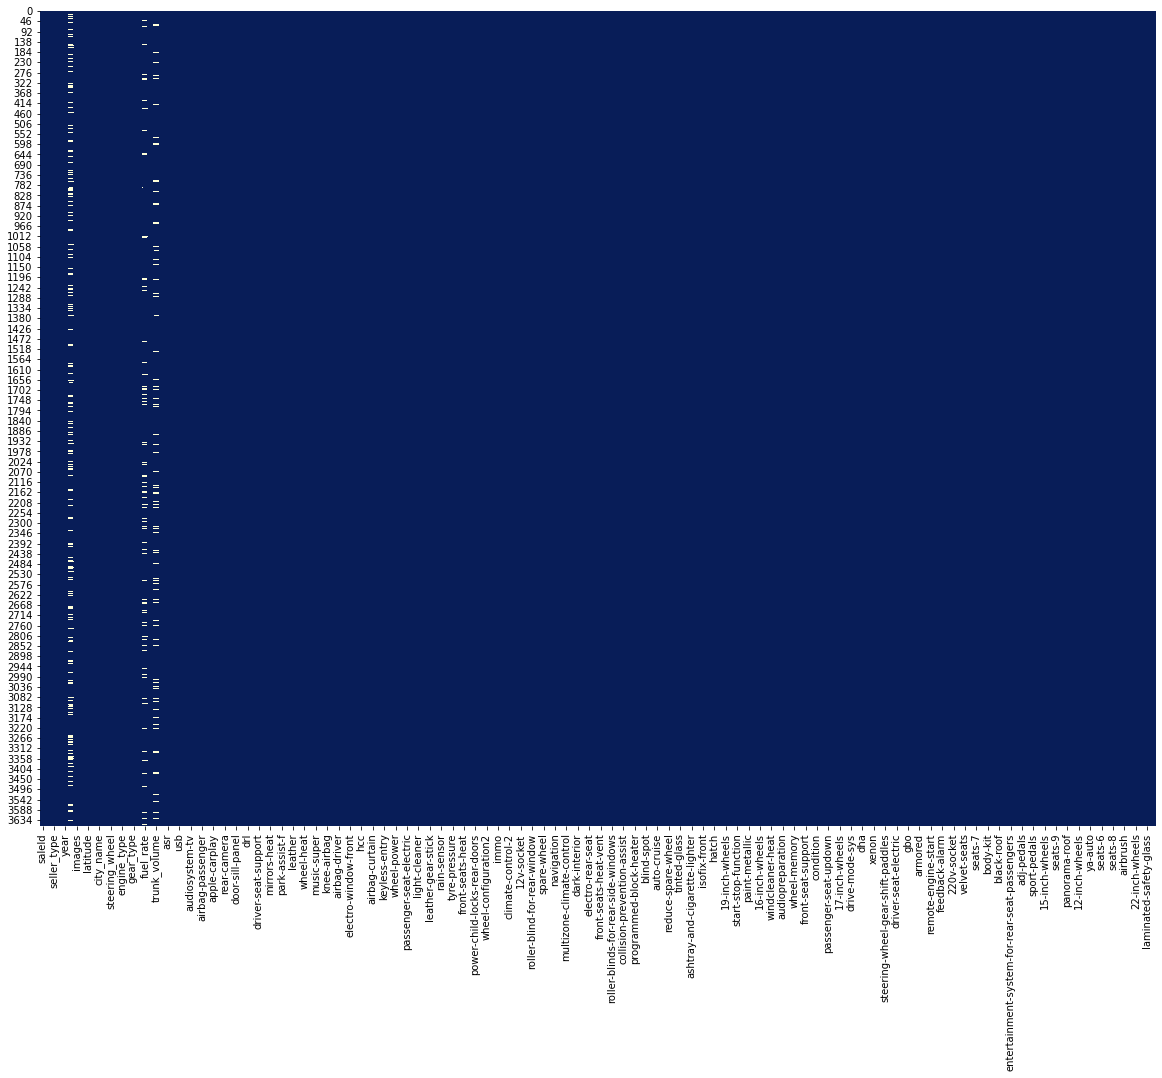

In [39]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r");

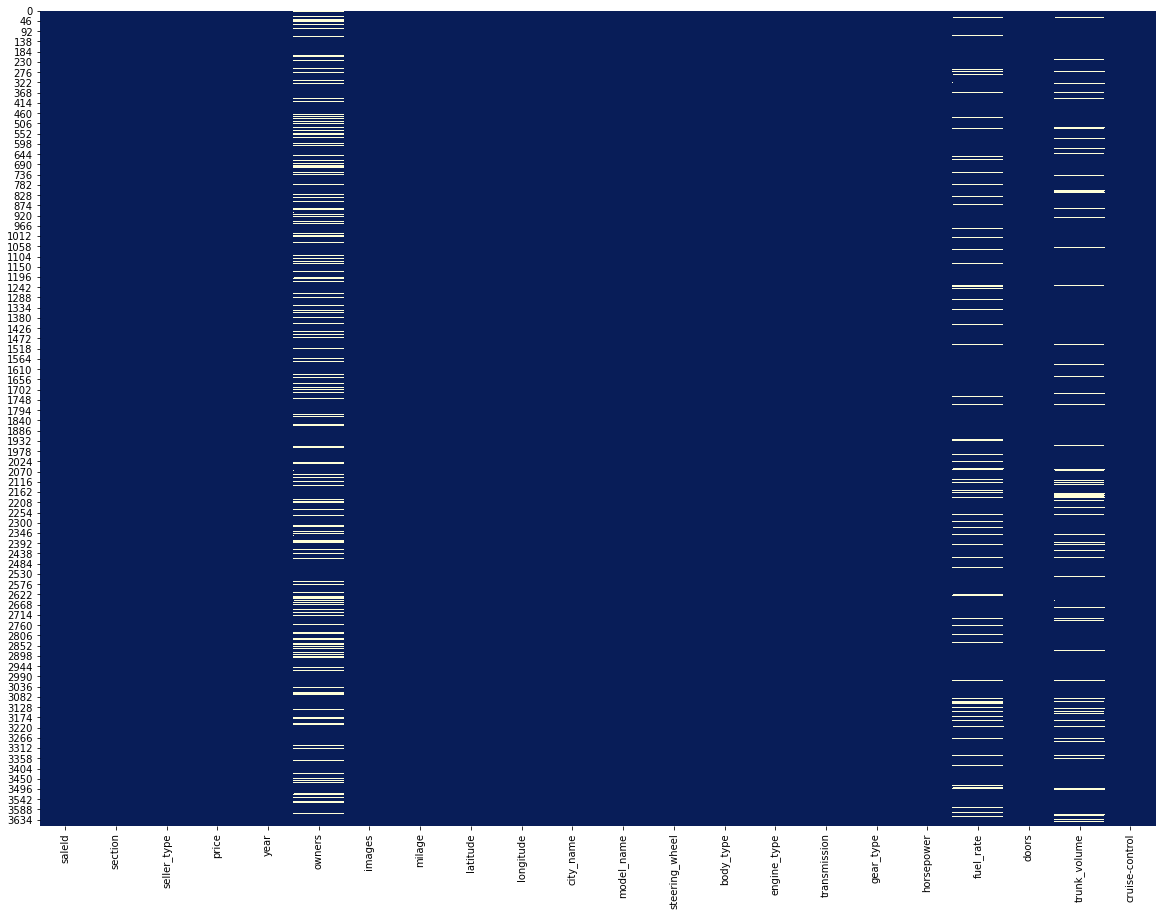

In [40]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.iloc[:, :22].isnull(), cbar=False, cmap="YlGnBu_r");

In [41]:
set(df[df['owners'].isnull()]['seller_type'])

{'COMMERCIAL'}

In [42]:
set(df[df['owners'].isnull()]['section'])

{'new'}

In [43]:
df['owners'].fillna(0, inplace=True)
df['owners'].isnull().sum()

0

In [44]:
print('All Nans: ', df.isnull().sum().sum())
print('fuel_rate Nans: ', df['fuel_rate'].isnull().sum().sum())
print('trunk_volume Nans: ', df['trunk_volume'].isnull().sum().sum())

All Nans:  659
fuel_rate Nans:  332
trunk_volume Nans:  327


In [45]:
df.groupby(by=['model_name','engine_type','transmission','gear_type','horsepower'])['fuel_rate'].mean()

model_name   engine_type  transmission  gear_type        horsepower
4RUNNER      GASOLINE     AUTOMATIC     ALL_WHEEL_DRIVE  245            NaN
                                                         273           12.4
                          MECHANICAL    ALL_WHEEL_DRIVE  143           14.6
ALLEX        GASOLINE     AUTOMATIC     FORWARD_CONTROL  110            6.0
ALLION       GASOLINE     AUTOMATIC     FORWARD_CONTROL  132            6.2
                                                                       ... 
YARIS        GASOLINE     MECHANICAL    FORWARD_CONTROL  86             NaN
                                                         87             6.0
                          ROBOT         FORWARD_CONTROL  87             5.8
                                                         101            5.1
YARIS_VERSO  GASOLINE     AUTOMATIC     FORWARD_CONTROL  86             NaN
Name: fuel_rate, Length: 403, dtype: float64

In [46]:
df.groupby(by=['model_name','year', 'body_type'])['trunk_volume'].mean()

model_name   year  body_type        
4RUNNER      1992  ALLROAD_5_DOORS      1200.0
             2005  ALLROAD_5_DOORS      1195.0
             2012  ALLROAD_5_DOORS      1336.0
ALLEX        2002  HATCHBACK_5_DOORS     290.0
ALLION       2006  SEDAN                   NaN
                                         ...  
YARIS        2009  HATCHBACK_5_DOORS     272.0
             2010  HATCHBACK_3_DOORS     272.0
             2015  HATCHBACK_5_DOORS     286.0
             2020  HATCHBACK_3_DOORS       NaN
YARIS_VERSO  2000  COMPACTVAN            380.0
Name: trunk_volume, Length: 516, dtype: float64

In [47]:
df.groupby(by=['model_name','year', 'body_type'])['trunk_volume'].mean().isnull().sum()

188

In [48]:
df['trunk_volume'] = df['trunk_volume'].fillna(
    df.groupby(['model_name','year', 'body_type'])['trunk_volume'].transform('mean')
)
df.groupby(by=['model_name','year', 'body_type'])['trunk_volume'].mean().isnull().sum()

188

In [49]:
df.groupby(by=['model_name','engine_type','transmission','gear_type','horsepower'])['fuel_rate'].mean().isnull().sum()

118

In [50]:
df['fuel_rate'] = df['fuel_rate'].fillna(
    df.groupby(by=['model_name','engine_type','transmission','gear_type','horsepower'])['fuel_rate'].transform('mean')
)
df.groupby(by=['model_name','engine_type','transmission','gear_type','horsepower'])['fuel_rate'].mean().isnull().sum()

118

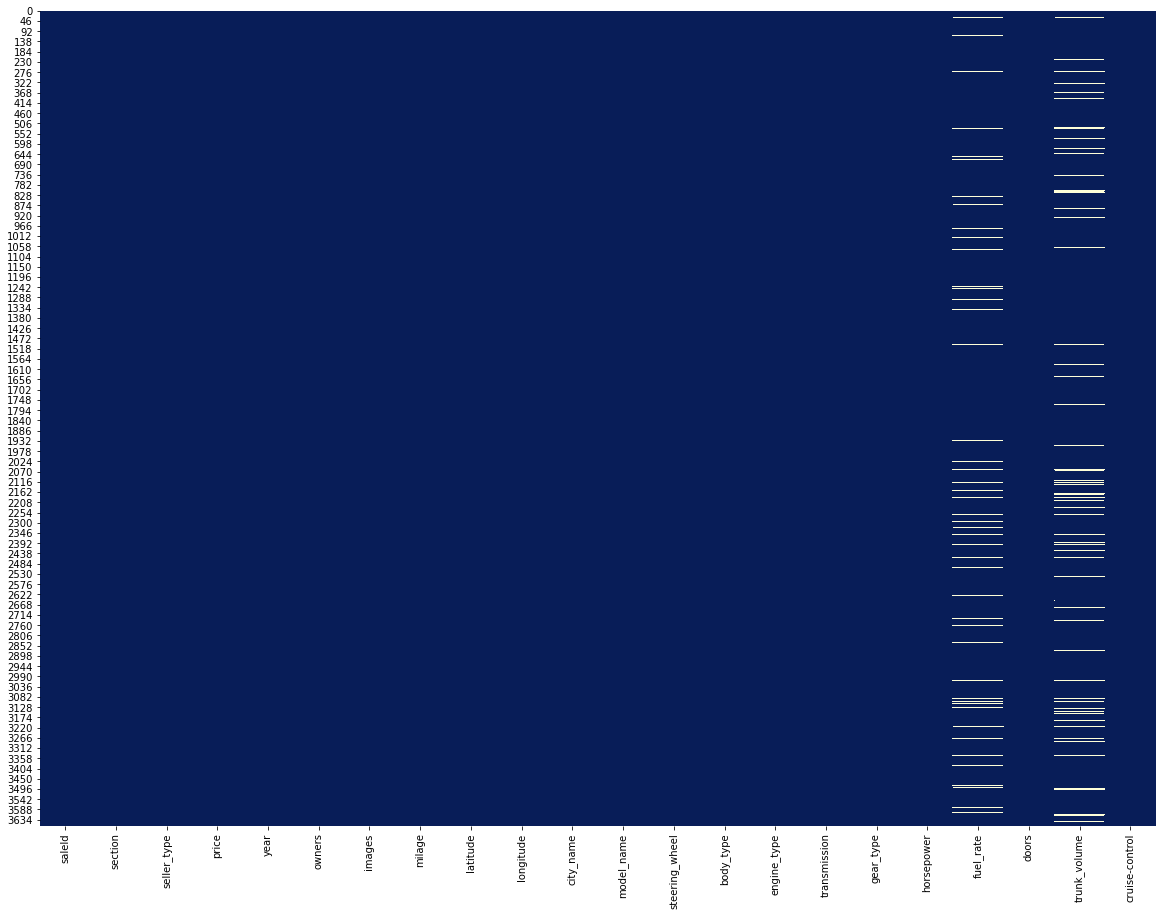

In [51]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.iloc[:, :22].isnull(), cbar=False, cmap="YlGnBu_r");

In [52]:
df.dropna(inplace=True)

In [53]:
df.drop_duplicates(inplace=True)

In [55]:
df.iloc[:, :21].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3662
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   saleId          3112 non-null   object 
 1   section         3112 non-null   object 
 2   seller_type     3112 non-null   object 
 3   price           3112 non-null   int64  
 4   year            3112 non-null   int64  
 5   owners          3112 non-null   float64
 6   images          3112 non-null   int64  
 7   milage          3112 non-null   int64  
 8   latitude        3112 non-null   float64
 9   longitude       3112 non-null   float64
 10  city_name       3112 non-null   object 
 11  model_name      3112 non-null   object 
 12  steering_wheel  3112 non-null   object 
 13  body_type       3112 non-null   object 
 14  engine_type     3112 non-null   object 
 15  transmission    3112 non-null   object 
 16  gear_type       3112 non-null   object 
 17  horsepower      3112 non-null   i

In [56]:
df.iloc[:,[3, 4, 5, 6, 7, 17, 19]] = df[[
    'price','year', 'images', 'milage', 'horsepower', 'doors', 'owners']].astype('int32')
df.iloc[:,[8, 9, 18, 20]] = df[[
    'latitude','longitude', 'fuel_rate', 'trunk_volume']].astype('float32')

In [72]:
equipment_cols = list(df.columns[21:])
df.iloc[:,21:] = df[equipment_cols].astype('int32')

In [58]:
df.describe()

price         year       owners       images         milage  \
count  3.112000e+03  3112.000000  3112.000000  3112.000000    3112.000000   
mean   2.001416e+06  2014.753535     1.608612    14.342866  101763.634640   
std    1.163714e+06     5.605766     1.288289     7.931707   90415.208916   
min    8.500000e+04  1988.000000     0.000000     1.000000       0.000000   
25%    1.199000e+06  2012.000000     1.000000     8.000000   19479.000000   
50%    1.879000e+06  2016.000000     1.000000    15.000000   90936.000000   
75%    2.570000e+06  2019.000000     2.000000    19.000000  159000.000000   
max    9.418000e+06  2021.000000     4.000000    40.000000  549540.000000   

          latitude    longitude   horsepower    fuel_rate        doors  ...  \
count  3112.000000  3112.000000  3112.000000  3112.000000  3112.000000  ...   
mean     54.604195    47.702827   180.907455     8.245362     4.519602  ...   
std       4.309847    18.577862    48.867112     1.976031     0.518015  ...   
min      42.876366    20.507307    67.000000     1.000000     2.000000  ...   
25%      54.369114    37.527548   147.000000     6.900000     4.000000  ...   
50%      55.721214    38.941914   177.000000     7.800000     5.000000  ...   
75%      56.110720    56.264126   200.000000     8.700000     5.000000  ...   
max      69.343987   142.738022   340.000000    17.500000     5.000000  ...   

           seats-6  front-camera      seats-8  duo-body-color     airbrush  \
count  3112.000000   3112.000000  3112.000000     3112.000000  3112.000000   
mean      0.001285      0.001285     0.000643        0.000643     0.000643   
std       0.035834      0.035834     0.025347        0.025347     0.025347   
min       0.000000      0.000000     0.000000        0.000000     0.000000   
25%       0.000000      0.000000     0.000000        0.000000     0.000000   
50%       0.000000      0.000000     0.000000        0.000000     0.000000   
75%       0.000000      0.000000     0.000000        0.000000     0.000000   
max       1.000000      1.000000     1.000000        1.000000     1.000000   

       massage-seats  22-inch-wheels  sport-suspension  \
count    3112.000000     3112.000000       3112.000000   
mean        0.000643        0.000321          0.000321   
std         0.025347        0.017926          0.017926   
min         0.000000        0.000000          0.000000   
25%         0.000000        0.000000          0.000000   
50%         0.000000        0.000000          0.000000   
75%         0.000000        0.000000          0.000000   
max         1.000000        1.000000          1.000000   

       laminated-safety-glass      seats-2  
count             3112.000000  3112.000000  
mean                 0.000321     0.000321  
std                  0.017926     0.017926  
min                  0.000000     0.000000  
25%                  0.000000     0.000000  
50%                  0.000000     0.000000  
75%                  0.000000     0.000000  
max                  1.000000     1.000000  

[8 rows x 186 columns]

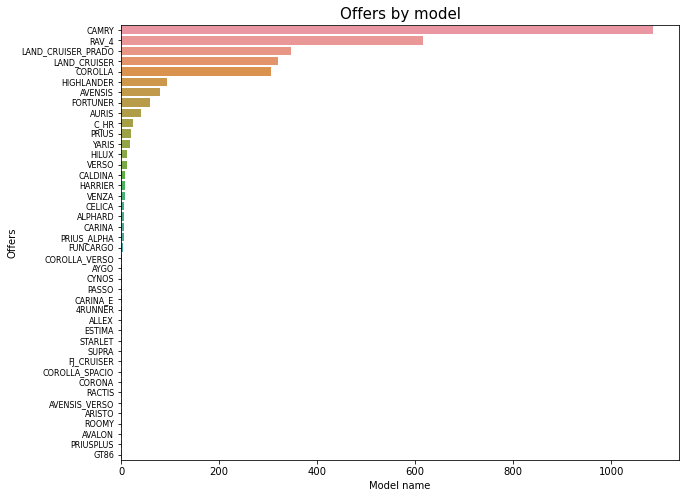

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y=df['model_name'], orient = 'h', order = df['model_name'].value_counts().index);
ax.set_xlabel('Model name')
ax.set_ylabel('Offers')
plt.title('Offers by model', fontsize=15)
plt.yticks(fontsize=8);

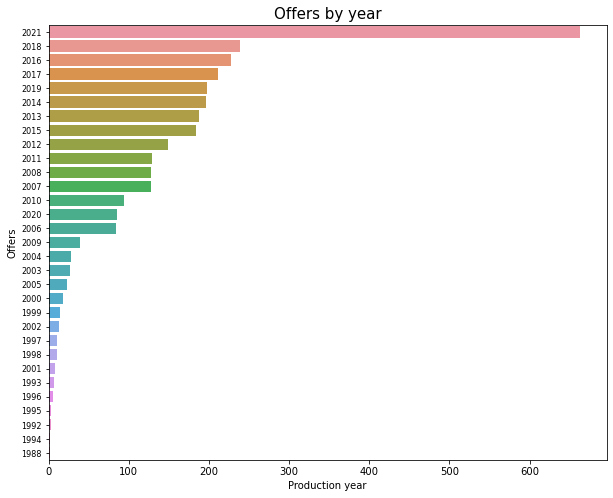

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y=df['year'], orient = 'h', order = df['year'].value_counts().index);
ax.set_xlabel('Production year')
ax.set_ylabel('Offers')
plt.title('Offers by year', fontsize=15)
plt.yticks(fontsize=8);

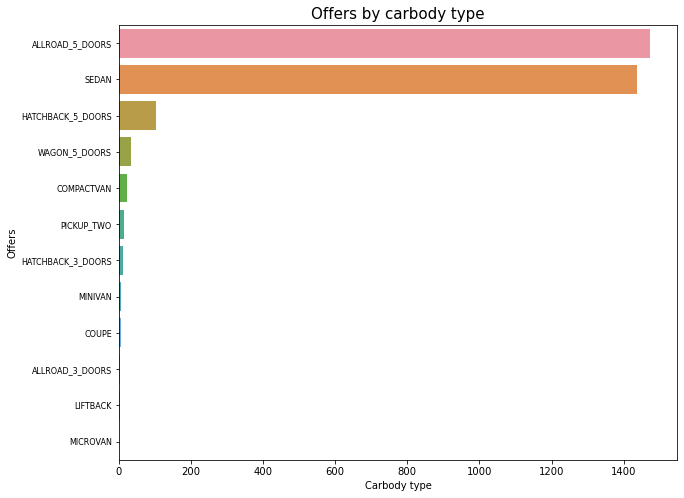

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y=df['body_type'], orient = 'h', order = df['body_type'].value_counts().index);
ax.set_xlabel('Carbody type')
ax.set_ylabel('Offers')
plt.title('Offers by carbody type', fontsize=15)
plt.yticks(fontsize=8);

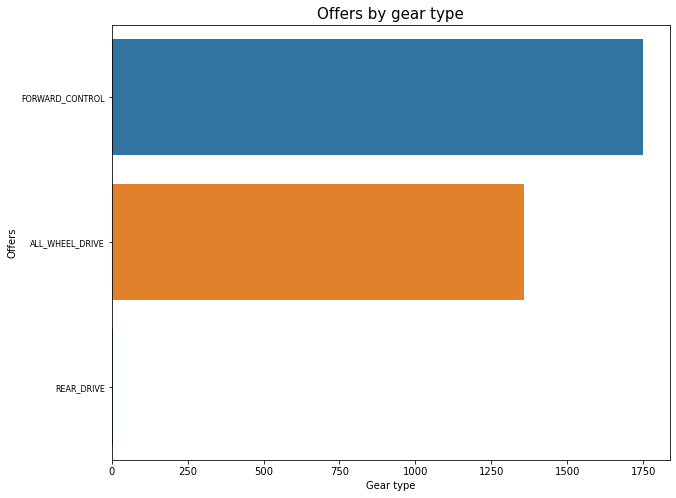

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y=df['gear_type'], orient = 'h', order = df['gear_type'].value_counts().index);
ax.set_xlabel('Gear type')
ax.set_ylabel('Offers')
plt.title('Offers by gear type', fontsize=15)
plt.yticks(fontsize=8);

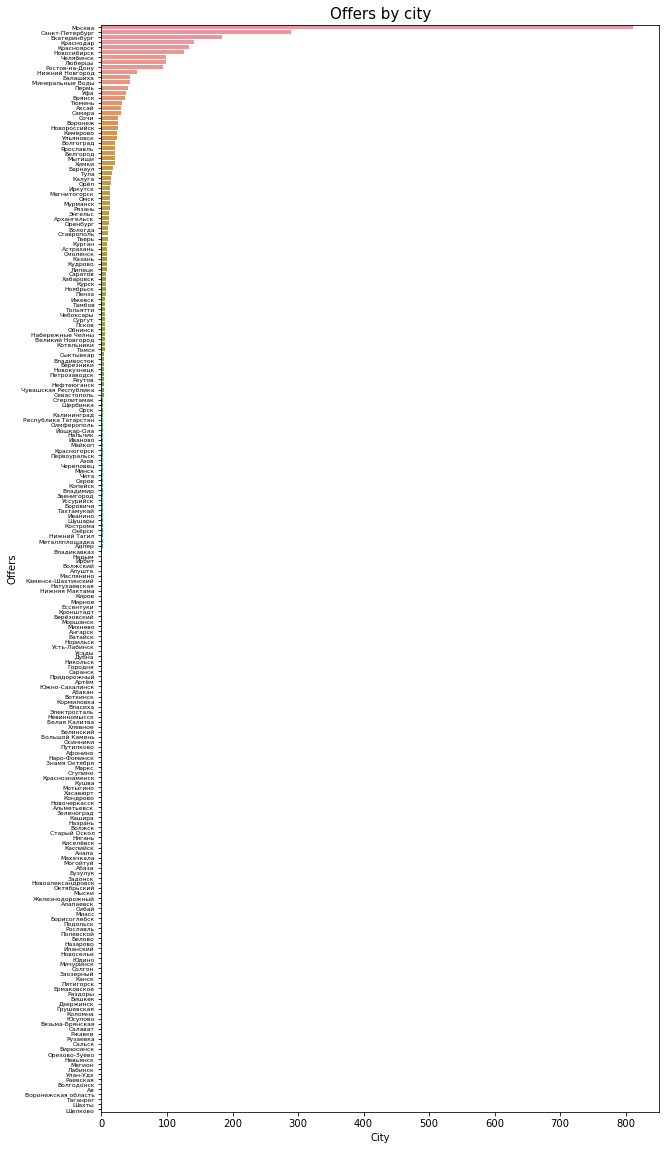

In [71]:
fig, ax = plt.subplots(figsize=(10,20))
sns.countplot(y=df['city_name'], orient = 'h', order = df['city_name'].value_counts().index);
ax.set_xlabel('City')
ax.set_ylabel('Offers')
plt.title('Offers by city', fontsize=15)
plt.yticks(fontsize=6);

In [65]:
df.columns[21:]

Index(['cruise-control', 'asr', 'esp', 'usb', 'multi-wheel', 'audiosystem-tv',
       'heated-wash-system', 'airbag-passenger', 'front-centre-armrest',
       'apple-carplay',
       ...
       'seats-6', 'front-camera', 'seats-8', 'duo-body-color', 'airbrush',
       'massage-seats', '22-inch-wheels', 'sport-suspension',
       'laminated-safety-glass', 'seats-2'],
      dtype='object', length=175)

In [66]:
df.columns[:21]

Index(['saleId', 'section', 'seller_type', 'price', 'year', 'owners', 'images',
       'milage', 'latitude', 'longitude', 'city_name', 'model_name',
       'steering_wheel', 'body_type', 'engine_type', 'transmission',
       'gear_type', 'horsepower', 'fuel_rate', 'doors', 'trunk_volume'],
      dtype='object')

In [77]:
cat_data = df.drop(columns=['saleId', 'city_name']).select_dtypes(include=['object']).columns
num_data=df.drop(columns=['saleId', 'city_name']).select_dtypes(exclude=['object']).columns[:11]

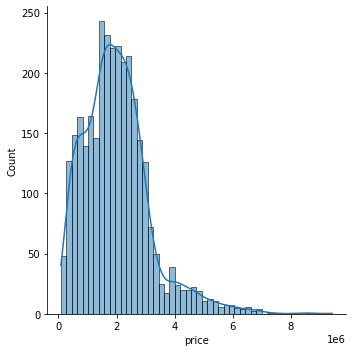

In [85]:
sns.displot(df['price'], kde=True);

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


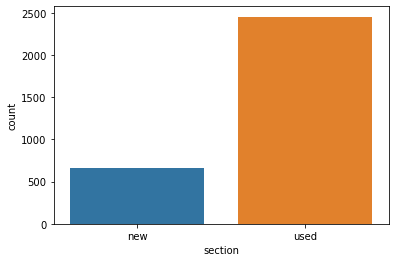

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


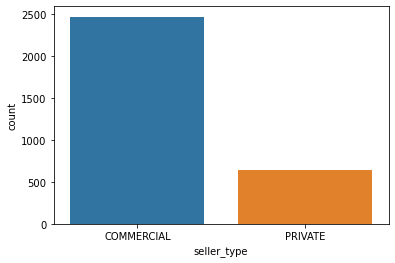

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


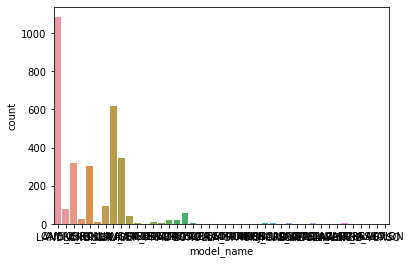

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


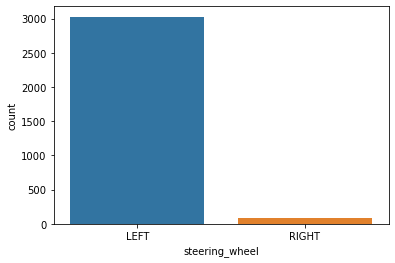

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


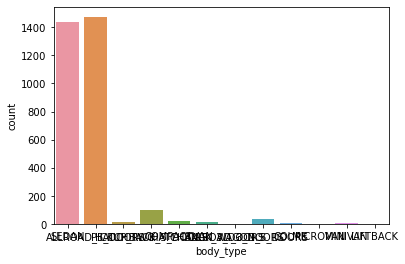

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


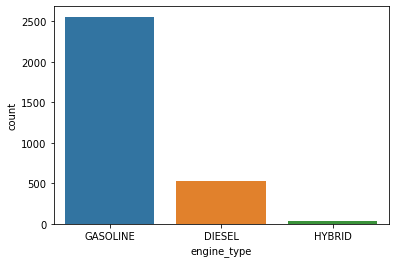

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


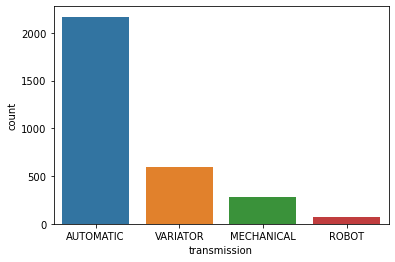

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


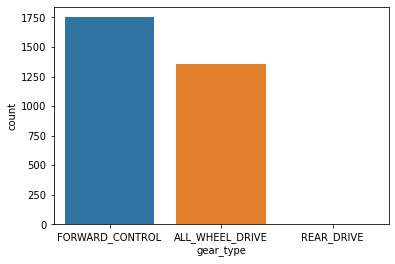

In [86]:
for c in cat_data[:9]:
    sns.countplot(df[c])
    plt.show()

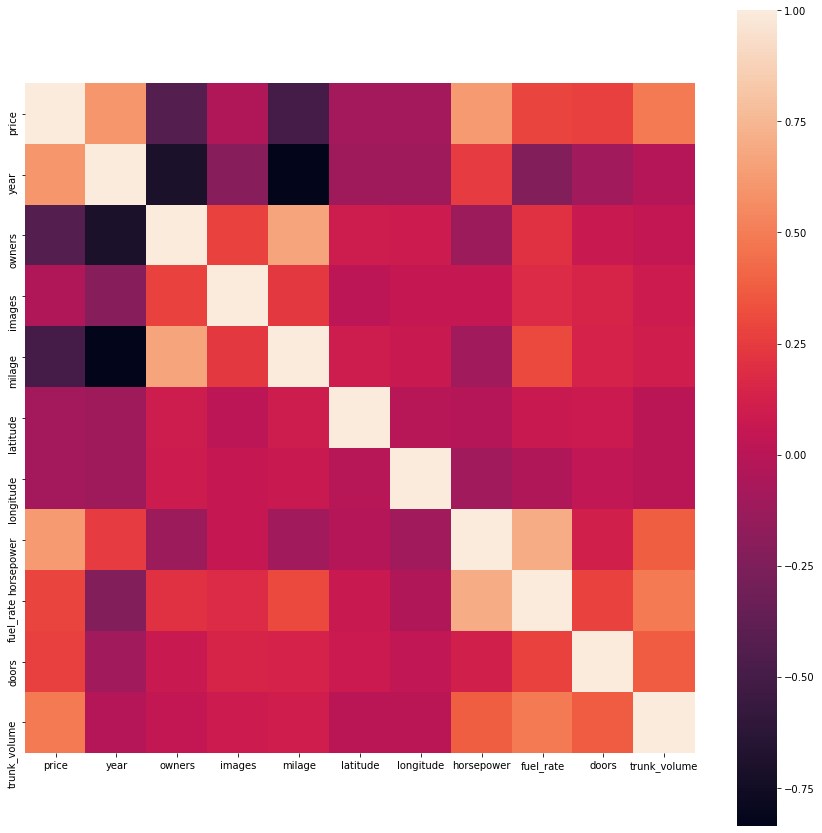

In [87]:
plt.subplots(figsize=(15,15))
sns.heatmap(df[num_data].corr(), square=True);

In [533]:
#insights:
#much horsepower = much fuel rate
#older car = many owners, more mileage, but lower price

In [88]:
corr=df.corr()
corr.style.background_gradient()

In [91]:
#insights:
#laminated-safety-glass & laser-lights, seats-2 & sport suspension have corr.coef.1, drop one of them
#if massage-seats is in equipment, laminated-safety-glass & laser-lights is in too, drop

In [89]:
df = df.drop(columns=['laminated-safety-glass', 'seats-2'])

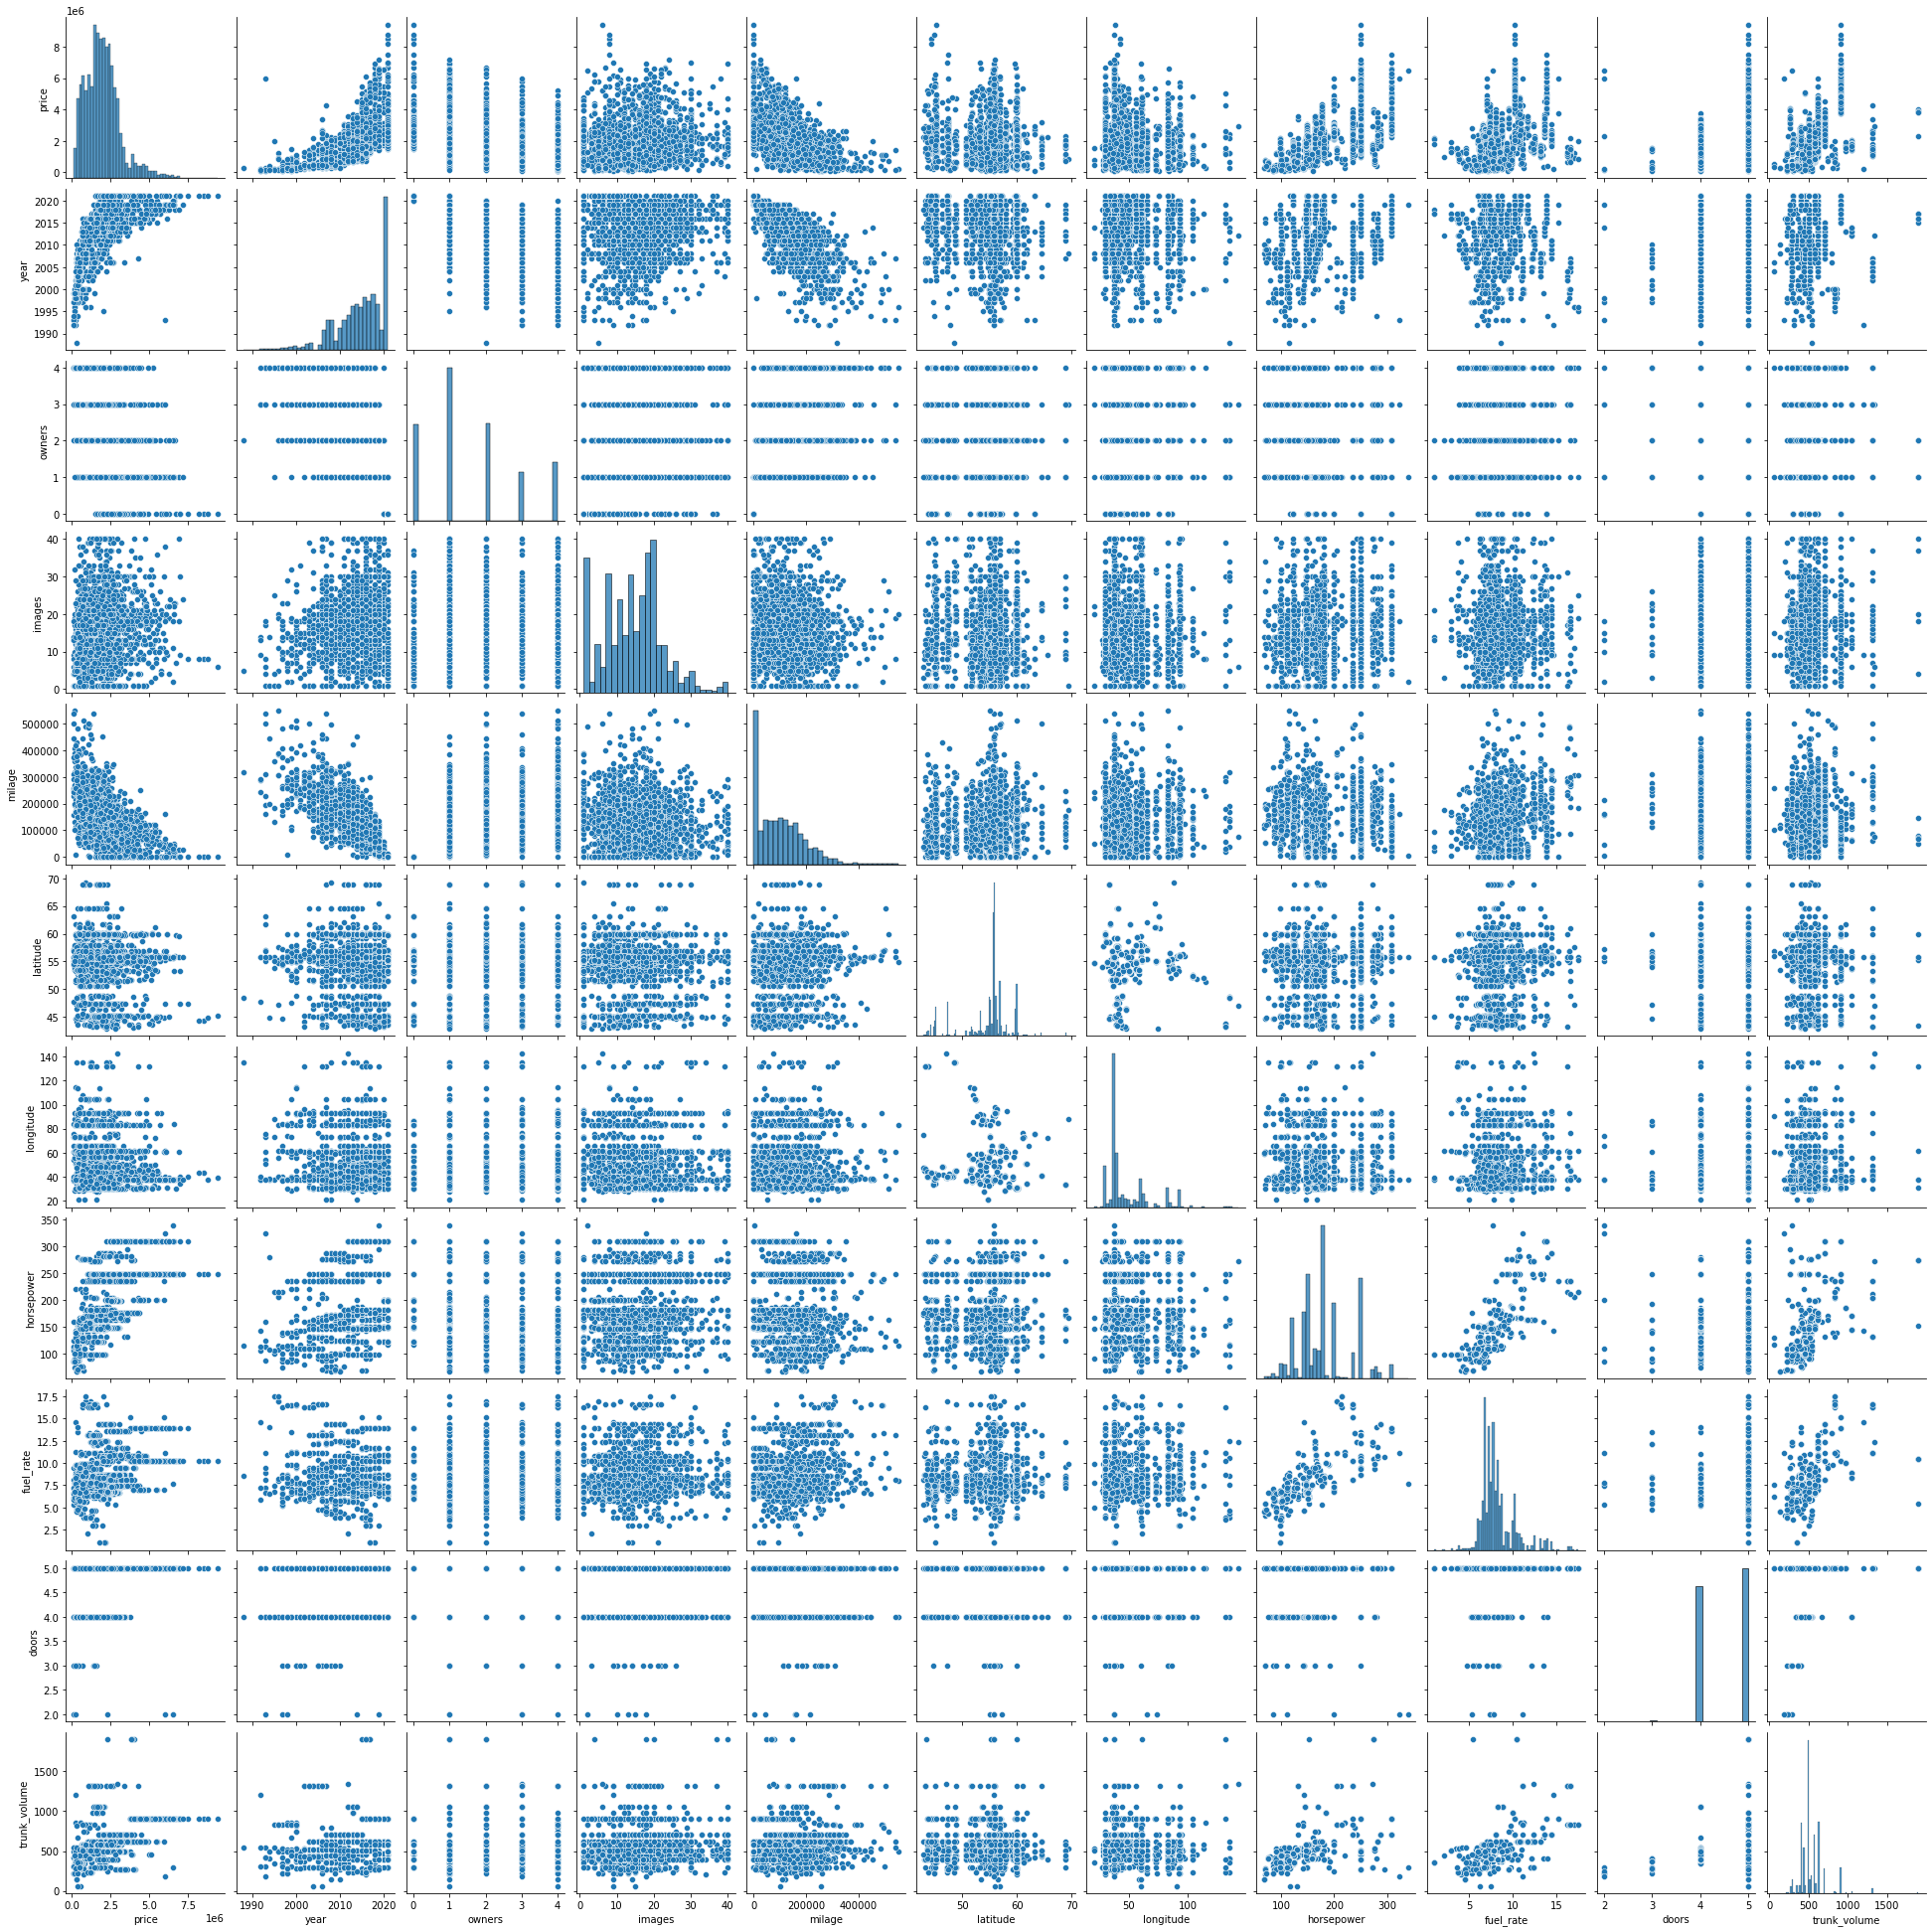

In [92]:
sns.pairplot(df[num_data])

In [ ]:
#insights
#same
#older car = higher mileage = lower price
#some interesting insight: trunk volume correlates w\fuel rate (big cars have big trunks, so as fuel rate)

In [90]:
#preprocessing & splitting

In [94]:
df.iloc[:3,:21]

saleId section seller_type    price  year  owners  images  \
0  1103436947-3831a793     new  COMMERCIAL  2406000  2021       0       8   
2  1103235819-6282160b    used     PRIVATE  2250000  2019       1       9   
3  1102772730-c6a3d125    used  COMMERCIAL  1397000  2016       1      17   

   milage   latitude  longitude  ... model_name steering_wheel body_type  \
0       0  55.328697  86.133400  ...      CAMRY           LEFT     SEDAN   
2   18440  65.535927  72.531342  ...      CAMRY           LEFT     SEDAN   
3   81500  55.811234  37.842270  ...    AVENSIS           LEFT     SEDAN   

  engine_type transmission        gear_type horsepower  fuel_rate  doors  \
0    GASOLINE    AUTOMATIC  FORWARD_CONTROL        200        6.8      4   
2    GASOLINE    AUTOMATIC  FORWARD_CONTROL        249        8.7      4   
3    GASOLINE     VARIATOR  FORWARD_CONTROL        152        6.1      4   

   trunk_volume  
0         500.0  
2         400.0  
3         509.0  

[3 rows x 21 columns]

In [96]:
df = df.drop(columns=['saleId', 'city_name'])

In [97]:
df.shape

(3112, 192)

In [98]:
df[cat_data]

section seller_type          model_name steering_wheel        body_type  \
0        new  COMMERCIAL               CAMRY           LEFT            SEDAN   
2       used     PRIVATE               CAMRY           LEFT            SEDAN   
3       used  COMMERCIAL             AVENSIS           LEFT            SEDAN   
4       used  COMMERCIAL        LAND_CRUISER           LEFT  ALLROAD_5_DOORS   
6        new  COMMERCIAL               CAMRY           LEFT            SEDAN   
...      ...         ...                 ...            ...              ...   
3657    used  COMMERCIAL  LAND_CRUISER_PRADO           LEFT  ALLROAD_5_DOORS   
3658    used  COMMERCIAL  LAND_CRUISER_PRADO           LEFT  ALLROAD_5_DOORS   
3660     new  COMMERCIAL               RAV_4           LEFT  ALLROAD_5_DOORS   
3661    used  COMMERCIAL               RAV_4           LEFT  ALLROAD_5_DOORS   
3662    used  COMMERCIAL        LAND_CRUISER           LEFT  ALLROAD_5_DOORS   

     engine_type transmission        gear_type  
0       GASOLINE    AUTOMATIC  FORWARD_CONTROL  
2       GASOLINE    AUTOMATIC  FORWARD_CONTROL  
3       GASOLINE     VARIATOR  FORWARD_CONTROL  
4       GASOLINE    AUTOMATIC  ALL_WHEEL_DRIVE  
6       GASOLINE    AUTOMATIC  FORWARD_CONTROL  
...          ...          ...              ...  
3657      DIESEL    AUTOMATIC  ALL_WHEEL_DRIVE  
3658      DIESEL    AUTOMATIC  ALL_WHEEL_DRIVE  
3660    GASOLINE    AUTOMATIC  ALL_WHEEL_DRIVE  
3661    GASOLINE     VARIATOR  ALL_WHEEL_DRIVE  
3662      DIESEL    AUTOMATIC  ALL_WHEEL_DRIVE  

[3112 rows x 8 columns]

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
ohe=OneHotEncoder(dtype='int32')
ohe_res = ohe.fit_transform(df[['section']])
ohe_res.toarray()

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [137]:
df.reset_index(drop=True, inplace=True)

In [148]:
df = df.join(pd.DataFrame(ohe_res.toarray(), columns=ohe.categories_[0]))
df.head()

section seller_type    price  year  owners  images  milage   latitude  \
0     new  COMMERCIAL  2406000  2021       0       8       0  55.328697   
1    used     PRIVATE  2250000  2019       1       9   18440  65.535927   
2    used  COMMERCIAL  1397000  2016       1      17   81500  55.811234   
3    used  COMMERCIAL  2549000  2013       2      13  154363  55.580193   
4     new  COMMERCIAL  2402940  2021       0      14       0  55.655045   

   longitude    model_name  ... seats-6 front-camera seats-8 duo-body-color  \
0  86.133400         CAMRY  ...       0            0       0              0   
1  72.531342         CAMRY  ...       0            0       0              0   
2  37.842270       AVENSIS  ...       0            0       0              0   
3  37.587135  LAND_CRUISER  ...       0            0       0              0   
4  37.902939         CAMRY  ...       0            0       0              0   

  airbrush  massage-seats  22-inch-wheels  sport-suspension  new  used  
0        0              0               0                 0    1     0  
1        0              0               0                 0    0     1  
2        0              0               0                 0    0     1  
3        0              0               0                 0    0     1  
4        0              0               0                 0    1     0  

[5 rows x 194 columns]

In [149]:
df.tail()

section seller_type    price  year  owners  images  milage   latitude  \
3107    used  COMMERCIAL  2499000  2012       2      20  170022  57.663067   
3108    used  COMMERCIAL  3570000  2018       1      18   58370  54.832336   
3109     new  COMMERCIAL  2574000  2021       0       4       0  55.228260   
3110    used  COMMERCIAL  1839000  2018       1      13  134475  51.678276   
3111    used  COMMERCIAL  2022000  2008       4      20  142242  59.872654   

      longitude          model_name  ... seats-6 front-camera seats-8  \
3107  39.846992  LAND_CRUISER_PRADO  ...       0            0       0   
3108  32.050850  LAND_CRUISER_PRADO  ...       0            0       0   
3109  61.375389               RAV_4  ...       0            0       0   
3110  39.289272               RAV_4  ...       0            0       0   
3111  30.352642        LAND_CRUISER  ...       0            0       0   

     duo-body-color airbrush  massage-seats  22-inch-wheels  sport-suspension  \
3107              0        0              0               0                 0   
3108              0        0              0               0                 0   
3109              0        0              0               0                 0   
3110              0        0              0               0                 0   
3111              0        0              0               0                 0   

      new  used  
3107    0     1  
3108    0     1  
3109    1     0  
3110    0     1  
3111    0     1  

[5 rows x 194 columns]

In [150]:
def to_ohe(data, cols):
    num_df = data.copy()
    ohe = OneHotEncoder(dtype='int32')
    for c in cols:
        ohe_res = ohe.fit_transform(df[[c]])
        num_df = num_df.join(pd.DataFrame(ohe_res.toarray(), columns=ohe.categories_[0]))
        num_df.drop(columns=c, axis = 1, inplace = True)
    return num_df

In [152]:
columns_to_encode = list([cat_data][0])[1:]
df0 = to_ohe(df, columns_to_encode).drop(columns='section')
df0

price  year  owners  images  milage   latitude  longitude  horsepower  \
0     2406000  2021       0       8       0  55.328697  86.133400         200   
1     2250000  2019       1       9   18440  65.535927  72.531342         249   
2     1397000  2016       1      17   81500  55.811234  37.842270         152   
3     2549000  2013       2      13  154363  55.580193  37.587135         309   
4     2402940  2021       0      14       0  55.655045  37.902939         200   
...       ...   ...     ...     ...     ...        ...        ...         ...   
3107  2499000  2012       2      20  170022  57.663067  39.846992         173   
3108  3570000  2018       1      18   58370  54.832336  32.050850         177   
3109  2574000  2021       0       4       0  55.228260  61.375389         199   
3110  1839000  2018       1      13  134475  51.678276  39.289272         146   
3111  2022000  2008       4      20  142242  59.872654  30.352642         235   

      fuel_rate  doors  ...  DIESEL  GASOLINE  HYBRID  AUTOMATIC  MECHANICAL  \
0           6.8      4  ...       0         1       0          1           0   
1           8.7      4  ...       0         1       0          1           0   
2           6.1      4  ...       0         1       0          0           0   
3          13.6      5  ...       0         1       0          1           0   
4           6.8      4  ...       0         1       0          1           0   
...         ...    ...  ...     ...       ...     ...        ...         ...   
3107        8.1      5  ...       1         0       0          1           0   
3108        7.4      5  ...       1         0       0          1           0   
3109        7.3      5  ...       0         1       0          1           0   
3110        7.5      5  ...       0         1       0          0           0   
3111       10.2      5  ...       1         0       0          1           0   

      ROBOT  VARIATOR  ALL_WHEEL_DRIVE  FORWARD_CONTROL  REAR_DRIVE  
0         0         0                0                1           0  
1         0         0                0                1           0  
2         0         1                0                1           0  
3         0         0                1                0           0  
4         0         0                0                1           0  
...     ...       ...              ...              ...         ...  
3107      0         0                1                0           0  
3108      0         0                1                0           0  
3109      0         0                1                0           0  
3110      0         1                1                0           0  
3111      0         0                1                0           0  

[3112 rows x 254 columns]

In [154]:
X = df0.drop('price', axis=1)
y = df0['price']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

In [156]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [157]:
sum(sel.get_support())

242

In [158]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)
sum(sel.get_support())

175

In [159]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [163]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
y_train = (y_train - df['price'].mean()) / df['price'].std()
y_test = (y_test - df['price'].mean()) / df['price'].std()

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [206]:
rfr = RandomForestRegressor(n_jobs=-1, verbose=1, random_state=123)

In [184]:
n_estimators = np.linspace(100, 1000, 10, dtype='int')
max_features = ['log2', 'sqrt']
max_depth = np.linspace(1, 15, 15, dtype='int')
min_samples_split = np.linspace(2, 30, 10, dtype='int')
min_samples_leaf = np.linspace(2, 30, 10, dtype='int')
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid = RandomizedSearchCV(rfr, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=123)
random_grid.fit(X_train, y_train)
random_grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished


{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': True}

In [188]:
random_grid_df = pd.DataFrame(random_grid.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
random_grid_df = random_grid_df.drop(['mean_fit_time', 
                                      'std_fit_time',
                                      'mean_score_time',
                                      'std_score_time',
                                      'params',
                                      'split0_test_score',
                                      'split1_test_score',
                                      'split2_test_score',
                                      'split3_test_score',
                                      'split4_test_score',
                                      'std_test_score'], axis=1)
random_grid_df.head(5)

param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                300                       5                      2   
1                200                      14                      8   
2               1000                      11                      8   
3                600                      20                      8   
4                200                      30                      5   

  param_max_features param_max_depth param_bootstrap  mean_test_score  \
0               sqrt              12            True         0.929590   
1               sqrt              15           False         0.910727   
2               sqrt              13           False         0.910090   
3               sqrt              13           False         0.907793   
4               sqrt              10           False         0.905320   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5

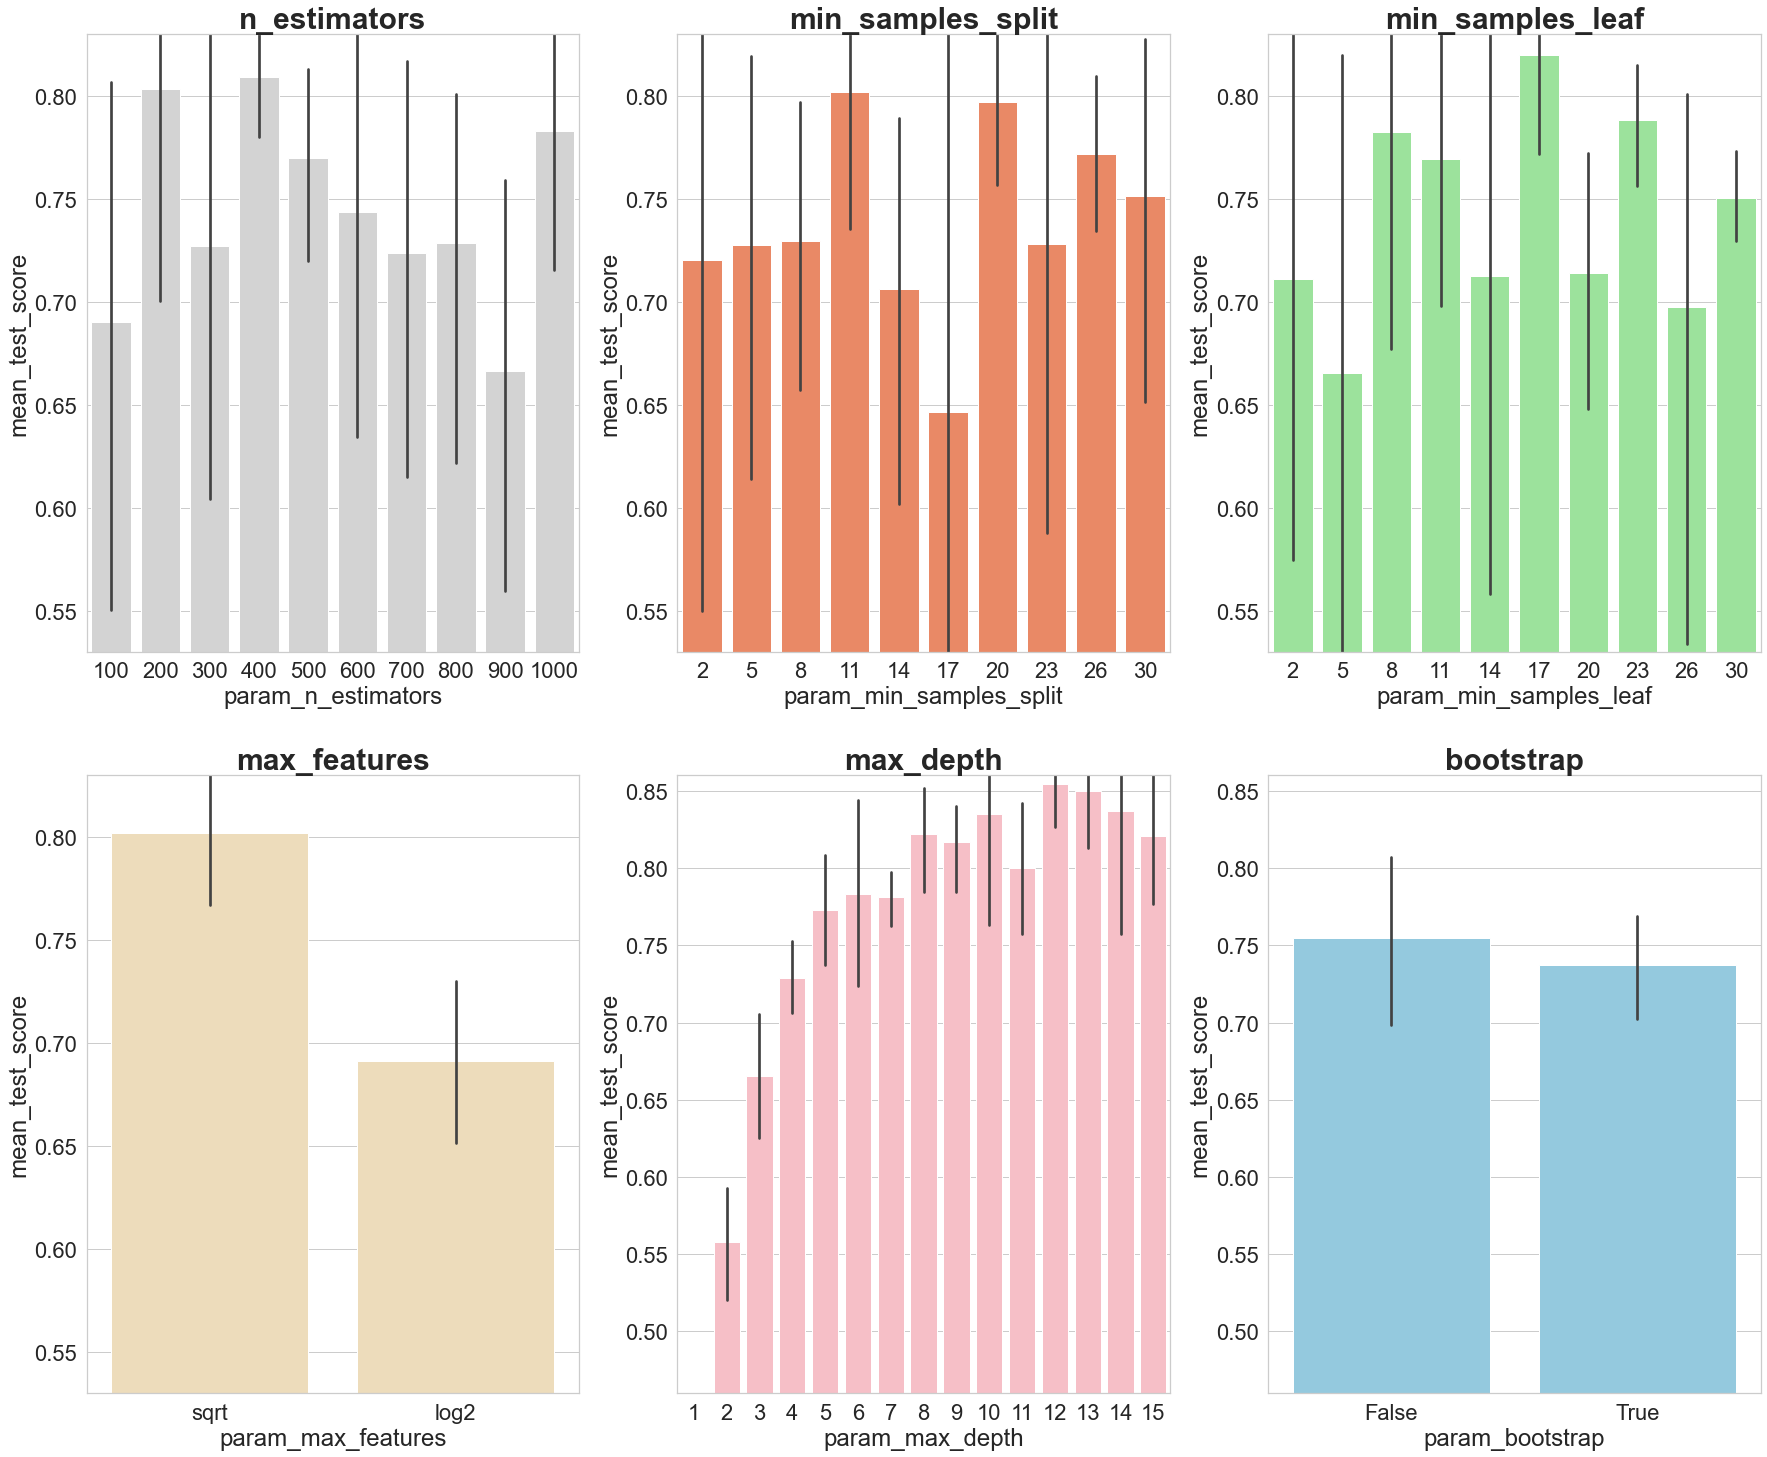

In [201]:
fig, ax = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=random_grid_df, ax=ax[0,0], color='lightgrey')
ax[0,0].set_ylim([.53,.83])
ax[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=random_grid_df, ax=ax[0,1], color='coral')
ax[0,1].set_ylim([.53,.83])
ax[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=random_grid_df, ax=ax[0,2], color='lightgreen')
ax[0,2].set_ylim([.53,.83])
ax[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=random_grid_df, ax=ax[1,0], color='wheat')
ax[1,0].set_ylim([.53,.83])
ax[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=random_grid_df, ax=ax[1,1], color='lightpink')
ax[1,1].set_ylim([.46,.86])
ax[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=random_grid_df, ax=ax[1,2], color='skyblue')
ax[1,2].set_ylim([.46,.86])
ax[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [203]:
n_estimators = [200, 400, 1000]
max_features = ['sqrt']
max_depth = [11,12,13]
min_samples_split = [9, 10, 11, 19, 20, 21]
min_samples_leaf = [16, 17, 18]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfr, param_grid, cv = 5, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished


{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 16,
 'min_samples_split': 9,
 'n_estimators': 200}

In [207]:
y_pred_gs = gs.best_estimator_.predict(X_test)
r2_score(y_test, y_pred_gs)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


0.8778812701213723